In [103]:
# 라이브러리 호출
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from datetime import datetime, timezone
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### 데이터 로드

In [2]:
path1 = os.path.join(os.path.split(os.getcwd())[0], "data\\reduction_data\\*.csv")
path2 = os.path.join(os.path.split(os.getcwd())[0], "data\\summoner\\*.csv")
file_path1 = glob(path1)
file_path2 = glob(path2)

player_info_data = pd.concat([pd.read_csv(file, encoding="utf-8") for file in file_path1], axis=0)
summoner_data = pd.concat([pd.read_csv(file, encoding="utf-8") for file in file_path2], axis=0)

display(player_info_data.head(3))
print(f"Player information data count : {len(player_info_data.index)}")
display(summoner_data.head(3))
print(f"Summoner data count : {len(summoner_data.index)}")

,leagueId,queueType,tier,rank,summonerId,puuid,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak
0,94da69b5-9744-4031-bf16-917e68722f6d,RANKED_SOLO_5x5,BRONZE,I,CL-MWfColtulz89D80YG9fwTkoNyEyEv4uLTJT1iIv4rVTk,uc0urX5w8IlvaETcbZnQjMefQzXw5cZNSOOM54qGn9sK3-...,25,24,16,False,False,False,False
1,356a6509-c501-449b-8dbf-dff17c76801d,RANKED_SOLO_5x5,BRONZE,I,GWpNIl1GHC_Tz-A5fqaxPm9rbFiHMeTIFEPlzqbdWP-eMQ...,xAZGvtlHKv0FghgZQOwhEClT7TKWAIU1MTPS-OWv-Hx3uK...,51,4,1,False,False,False,True
2,410b6c38-1a8f-4d38-883a-54fddfb53873,RANKED_SOLO_5x5,BRONZE,I,ibPlB3MK2kMuMp-aVRf3eQ3mwSNdWJb5dH4ckr2hRmGZ33k,_2p9MavMeQ91PkjjHjd_a8NBlEa9St2iH-IkXqyPVBqZDx...,41,8,10,False,False,False,True


Player information data count : 231930


,id,accountId,puuid,profileIconId,revisionDate,summonerLevel
0,CL-MWfColtulz89D80YG9fwTkoNyEyEv4uLTJT1iIv4rVTk,jO8qWw6PeEyoDlo7laPhy_gCB9PEGB6ZRuc-rNVH0mdObe...,uc0urX5w8IlvaETcbZnQjMefQzXw5cZNSOOM54qGn9sK3-...,4832,1743066171249,123
1,GWpNIl1GHC_Tz-A5fqaxPm9rbFiHMeTIFEPlzqbdWP-eMQ...,m-63Zg6x6upKZQD6GLFgLpckxHS1zZ4lETJ4EsOZZGSjFh...,xAZGvtlHKv0FghgZQOwhEClT7TKWAIU1MTPS-OWv-Hx3uK...,6727,1742882526000,82
2,ibPlB3MK2kMuMp-aVRf3eQ3mwSNdWJb5dH4ckr2hRmGZ33k,2haKR57rTVUmQHfHZ__ht5bq8ShBz3VXlSms_Ty8_jcRyBg,_2p9MavMeQ91PkjjHjd_a8NBlEa9St2iH-IkXqyPVBqZDx...,1385,1742657779000,60


Summoner data count : 231930


In [3]:
data = pd.merge(player_info_data, summoner_data, how="outer", on="puuid")
data.head()

,leagueId,queueType,tier,rank,summonerId,puuid,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak,id,accountId,profileIconId,revisionDate,summonerLevel
0,b61f0056-4258-4256-87e1-f74b8cb46132,RANKED_SOLO_5x5,BRONZE,III,_mr6lm7Iq4Q8xvd8Aac0w7jcitGyr9ySfN36ERY0B6q1OYY,---0MOw_ZqpQgECMxZXgXP4raS5Rewpl0HaSLcDgHfEasY...,78,2,7,False,False,False,False,_mr6lm7Iq4Q8xvd8Aac0w7jcitGyr9ySfN36ERY0B6q1OYY,l0Zt1oYo3RfvOOjsTTuC-YkZs31HL0kx1pBjaRqcuJC0l9...,18,1739790005000,38
1,a3447854-f238-4f2d-9be0-86c6d58166e0,RANKED_SOLO_5x5,DIAMOND,IV,M_pMoD_q2cfL5R20uE3WzURcW5RSXjP0R5zPIrkMJ5bmHA...,---SB99NOn2_2F_LfWf_XGvf4MHjKhh4ldbP3vNGSl6uUw...,0,30,22,False,False,False,False,M_pMoD_q2cfL5R20uE3WzURcW5RSXjP0R5zPIrkMJ5bmHA...,E7MBKm0TUm-ARtQh_P5Vmqtl2ph_6H33YoDRYszp74nZuE...,5212,1743080553788,181
2,c9daef66-a2e8-43bb-810d-d8ec258be817,RANKED_SOLO_5x5,SILVER,IV,ipwJHwlWpV1i83ATyVkAZ419FGVriDKB6eXg5_CzX7Lb7I...,---fjIOKxIoVJk_3Q5bWcwKHRFprOgWsd2OtSPvozqO79O...,86,292,316,False,False,False,False,ipwJHwlWpV1i83ATyVkAZ419FGVriDKB6eXg5_CzX7Lb7I...,0VAnIYdYls2ZbKAw4ue0Lt2l8vNuOFgQyOy3OI_5A2QOm8...,5371,1742982418000,611
3,b504386e-4441-4010-825e-5c80048a9f4b,RANKED_SOLO_5x5,IRON,I,fFyp3s3F5guLUINy0ezCphnsIkzYpVZeqgQbBLS2IXQN5F...,---on-JsnIEErg9nUcOjCqlXaHHLaHQrVRqVZs5bLY7cag...,13,5,7,False,False,False,False,fFyp3s3F5guLUINy0ezCphnsIkzYpVZeqgQbBLS2IXQN5F...,UnAADD_DBXS_Cd7tRGJo_cpPwgC-qN9yrsckH9WDduHva_...,4025,1741502335000,65
4,98f1d2b8-17c8-49d9-914f-ba11039f6634,RANKED_SOLO_5x5,IRON,IV,s5Iaf6_X0H9HlfF1LU6dh7y_daBQJ9-yxGCSPkJgy1Qy1q...,---tGj0JC01kU7KQvwHB1H1YQ1zaOSMf5nzNELMt13IKiF...,87,4,8,False,False,False,False,s5Iaf6_X0H9HlfF1LU6dh7y_daBQJ9-yxGCSPkJgy1Qy1q...,Zrw8d7N1Ucz06Eh73CnmHZR7M-qUBdN8hijRTGqKHuyp88...,5645,1743224663723,238


### Churn 생성

In [4]:
c_data = []
for revData in data["revisionDate"]:
    diff = (datetime.now(timezone.utc) - datetime.fromtimestamp(revData / 1000, tz=timezone.utc)).days
    if diff > 29:
        c_data.append(1)
    else:
        c_data.append(0)

data["churn"] = c_data

data.head()

,leagueId,queueType,tier,rank,summonerId,puuid,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak,id,accountId,profileIconId,revisionDate,summonerLevel,churn
0,b61f0056-4258-4256-87e1-f74b8cb46132,RANKED_SOLO_5x5,BRONZE,III,_mr6lm7Iq4Q8xvd8Aac0w7jcitGyr9ySfN36ERY0B6q1OYY,---0MOw_ZqpQgECMxZXgXP4raS5Rewpl0HaSLcDgHfEasY...,78,2,7,False,False,False,False,_mr6lm7Iq4Q8xvd8Aac0w7jcitGyr9ySfN36ERY0B6q1OYY,l0Zt1oYo3RfvOOjsTTuC-YkZs31HL0kx1pBjaRqcuJC0l9...,18,1739790005000,38,1
1,a3447854-f238-4f2d-9be0-86c6d58166e0,RANKED_SOLO_5x5,DIAMOND,IV,M_pMoD_q2cfL5R20uE3WzURcW5RSXjP0R5zPIrkMJ5bmHA...,---SB99NOn2_2F_LfWf_XGvf4MHjKhh4ldbP3vNGSl6uUw...,0,30,22,False,False,False,False,M_pMoD_q2cfL5R20uE3WzURcW5RSXjP0R5zPIrkMJ5bmHA...,E7MBKm0TUm-ARtQh_P5Vmqtl2ph_6H33YoDRYszp74nZuE...,5212,1743080553788,181,0
2,c9daef66-a2e8-43bb-810d-d8ec258be817,RANKED_SOLO_5x5,SILVER,IV,ipwJHwlWpV1i83ATyVkAZ419FGVriDKB6eXg5_CzX7Lb7I...,---fjIOKxIoVJk_3Q5bWcwKHRFprOgWsd2OtSPvozqO79O...,86,292,316,False,False,False,False,ipwJHwlWpV1i83ATyVkAZ419FGVriDKB6eXg5_CzX7Lb7I...,0VAnIYdYls2ZbKAw4ue0Lt2l8vNuOFgQyOy3OI_5A2QOm8...,5371,1742982418000,611,0
3,b504386e-4441-4010-825e-5c80048a9f4b,RANKED_SOLO_5x5,IRON,I,fFyp3s3F5guLUINy0ezCphnsIkzYpVZeqgQbBLS2IXQN5F...,---on-JsnIEErg9nUcOjCqlXaHHLaHQrVRqVZs5bLY7cag...,13,5,7,False,False,False,False,fFyp3s3F5guLUINy0ezCphnsIkzYpVZeqgQbBLS2IXQN5F...,UnAADD_DBXS_Cd7tRGJo_cpPwgC-qN9yrsckH9WDduHva_...,4025,1741502335000,65,0
4,98f1d2b8-17c8-49d9-914f-ba11039f6634,RANKED_SOLO_5x5,IRON,IV,s5Iaf6_X0H9HlfF1LU6dh7y_daBQJ9-yxGCSPkJgy1Qy1q...,---tGj0JC01kU7KQvwHB1H1YQ1zaOSMf5nzNELMt13IKiF...,87,4,8,False,False,False,False,s5Iaf6_X0H9HlfF1LU6dh7y_daBQJ9-yxGCSPkJgy1Qy1q...,Zrw8d7N1Ucz06Eh73CnmHZR7M-qUBdN8hijRTGqKHuyp88...,5645,1743224663723,238,0


In [5]:
data["churn"].value_counts()

churn
0    205071
1     27971
Name: count, dtype: int64

### 필요없는 column 제거
- ~~leagueId~~
- ~~queueType~~
- `tier`
- `rank`
- ~~summonerId~~
- ~~puuid:~~ merge할 때 기준으로 잡음
- ~~leaguePoints~~
- wins
- losses
- `winRate`: wins, losses로 승률 데이터 만들기
- `veteran`: 같은 티어(혹은 랭크)에 몇 시즌(기준이 안나와 있음)동안 있었는지
- ***~~inactive:~~*** 비활동 여부
- `freshBlood`: 게임 신규 입문자
    - 실제 이탈자는 약 12%, 게임 신규 입문자는 약 8%
    - 오래된 유저가 이탈하는지 신규 유저가 이탈하는지 분석할 수 있음
- `hotStreak`: 연승 여부
    - 연승을 하고 있으면 이탈이 아닐 수 있는데, 연승을 하고 있어도 이탈하는 유저가 있을 수 있다는 것을 분석하자 (후자는 우리 기준에서 이상치)
- ~~id~~
- ~~accountId~~
- ~~profileIconId~~
- revisionDate → `dateTime`으로 바꿔서 컬럼 저장
- `summonerLevel`
- `sinceRev`
    - 시각화에만 사용, 머신러닝에는 사용 x
- `churn`
- `championId`
- `championLevel`: user가 가진 champion의 레벨
- `championPoints`: user가 가진 champion의 숙련도
- `championSeasonMilestone`: 시즌 내에서 champion 숙련도 마일스톤을 얼마나 달성했는지

**실제 필요한 columns**
- tier
- rank
- wins
- losses
    - winRate
- veteran
- freshBlood
- hotStreak
- revisionDate -> datetime
- summonerLevel
- churn

In [6]:
drop_data = data.drop(["leagueId", "queueType", "summonerId", "puuid", "leaguePoints", "id", "accountId", "profileIconId"], axis=1)
drop_data.head()

,tier,rank,wins,losses,veteran,inactive,freshBlood,hotStreak,revisionDate,summonerLevel,churn
0,BRONZE,III,2,7,False,False,False,False,1739790005000,38,1
1,DIAMOND,IV,30,22,False,False,False,False,1743080553788,181,0
2,SILVER,IV,292,316,False,False,False,False,1742982418000,611,0
3,IRON,I,5,7,False,False,False,False,1741502335000,65,0
4,IRON,IV,4,8,False,False,False,False,1743224663723,238,0


In [7]:
# drop_data.to_csv("drop_data.csv", index=False, encoding="utf-8")

### 결측값 확인

In [34]:
drop_data.isna().sum()

tier             0
rank             0
wins             0
losses           0
veteran          0
inactive         0
freshBlood       0
hotStreak        0
revisionDate     0
summonerLevel    0
churn            0
dtype: int64

In [33]:
display(drop_data[(drop_data["wins"] == 0)])
display(drop_data[(drop_data["losses"] == 0)])
display(drop_data[(drop_data["wins"] == 0) & (drop_data["losses"] == 0)])

,tier,rank,wins,losses,veteran,inactive,freshBlood,hotStreak,revisionDate,summonerLevel,churn
31,IRON,IV,0,5,False,False,False,False,1741446506000,48,0
298,BRONZE,II,0,10,False,False,False,False,1743087252554,284,0
360,SILVER,IV,0,5,False,False,False,False,1739106460000,85,1
656,PLATINUM,III,0,5,False,False,False,False,1742050645000,74,0
758,GOLD,III,0,5,False,False,False,False,1739713169000,305,1
...,...,...,...,...,...,...,...,...,...,...,...
232115,PLATINUM,IV,0,6,False,False,False,False,1743080120017,167,0
232262,GOLD,III,0,5,False,False,False,False,1742623308000,175,0
232282,EMERALD,II,0,5,False,False,False,False,1742400254000,637,0
232598,BRONZE,IV,0,5,False,False,False,False,1742911529000,305,0


,tier,rank,wins,losses,veteran,inactive,freshBlood,hotStreak,revisionDate,summonerLevel,churn
330,PLATINUM,I,5,0,False,False,False,True,1741770373000,86,0
344,GOLD,III,5,0,False,False,False,True,1736473508000,214,1
479,SILVER,III,5,0,False,False,False,True,1739532880000,38,1
1549,SILVER,IV,5,0,False,False,False,True,1740729102000,262,0
2056,GOLD,IV,5,0,False,False,False,True,1741043733000,44,0
...,...,...,...,...,...,...,...,...,...,...,...
230368,DIAMOND,IV,8,0,False,False,False,True,1740823484000,213,0
230876,PLATINUM,II,5,0,False,False,False,True,1740413942000,90,1
231573,SILVER,I,5,0,False,False,False,True,1740563091000,146,1
231744,SILVER,IV,7,0,False,False,False,True,1741687961000,367,0


,tier,rank,wins,losses,veteran,inactive,freshBlood,hotStreak,revisionDate,summonerLevel,churn


### 중복값 제거

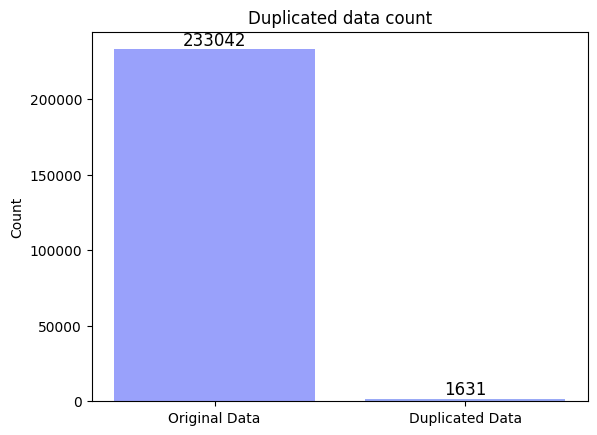

In [8]:
colors = sns.color_palette('winter', len(drop_data.columns))

duplicated = len(drop_data[drop_data.duplicated()].index)
original = len(drop_data.index)
# height = drop_data[drop_data.duplicated()].count().values
# print(list(drop_data[drop_data.duplicated()].count().items()))
bar = plt.bar(x=["Original Data", "Duplicated Data"], height=[original, duplicated], color=colors, alpha=0.4)
plt.title("Duplicated data count")
plt.ylabel("Count")
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % height, ha='center', va='bottom', size = 12)
plt.show()


In [9]:
drop_dupl_data = drop_data.drop_duplicates(keep="first").reset_index(drop=True)
drop_dupl_data.tail()

,tier,rank,wins,losses,veteran,inactive,freshBlood,hotStreak,revisionDate,summonerLevel,churn
231406,IRON,I,15,16,False,False,False,False,1743185135546,67,0
231407,SILVER,III,7,16,False,False,False,False,1741963269000,137,0
231408,IRON,II,6,7,False,False,False,False,1739599632000,165,1
231409,SILVER,I,3,8,False,False,False,False,1742919750000,394,0
231410,PLATINUM,I,28,17,False,False,True,False,1743072633363,382,0


### revisionDate 변환

In [15]:
rev_diff_data = []
for revisionDate in drop_dupl_data["revisionDate"]:
    rev_diff = datetime.now(timezone.utc) - datetime.fromtimestamp(revisionDate / 1000, tz=timezone.utc)
    rev_diff_data.append(rev_diff.days)

rev_trans_data = drop_dupl_data.copy()
rev_trans_data["revisionDate"] = rev_diff_data

rev_trans_data.head()

,tier,rank,wins,losses,veteran,inactive,freshBlood,hotStreak,revisionDate,summonerLevel,churn
0,BRONZE,III,2,7,False,False,False,False,40,38,1
1,DIAMOND,IV,30,22,False,False,False,False,2,181,0
2,SILVER,IV,292,316,False,False,False,False,3,611,0
3,IRON,I,5,7,False,False,False,False,20,65,0
4,IRON,IV,4,8,False,False,False,False,0,238,0


In [58]:
a = datetime.now(timezone.utc) - datetime.fromtimestamp(1698243784000 / 1000, tz=timezone.utc)
print(a.days)

521


### winRate 변환

In [44]:
win_rate_data = rev_trans_data.copy()

win_rate_data['winRate'] = win_rate_data['wins'] / (win_rate_data['wins'] + win_rate_data['losses']) * 100

losses_index = win_rate_data.columns.get_loc("losses")

win_rate_data.insert(losses_index + 1, "winRate", win_rate_data.pop("winRate"))

win_rate_data = win_rate_data.drop(["wins", "losses"], axis=1)

win_rate_data.head()

,tier,rank,winRate,veteran,inactive,freshBlood,hotStreak,revisionDate,summonerLevel,churn
0,BRONZE,III,22.222222,False,False,False,False,40,38,1
1,DIAMOND,IV,57.692308,False,False,False,False,2,181,0
2,SILVER,IV,48.026316,False,False,False,False,3,611,0
3,IRON,I,41.666667,False,False,False,False,20,65,0
4,IRON,IV,33.333333,False,False,False,False,0,238,0


### veteran, inactive, freshBlood, hotStreak 데이터 분포 확인

veteran
False    230940
True        471
Name: count, dtype: int64
inactive
False    231411
Name: count, dtype: int64
freshBlood
False    212471
True      18940
Name: count, dtype: int64
hotStreak
False    207636
True      23775
Name: count, dtype: int64


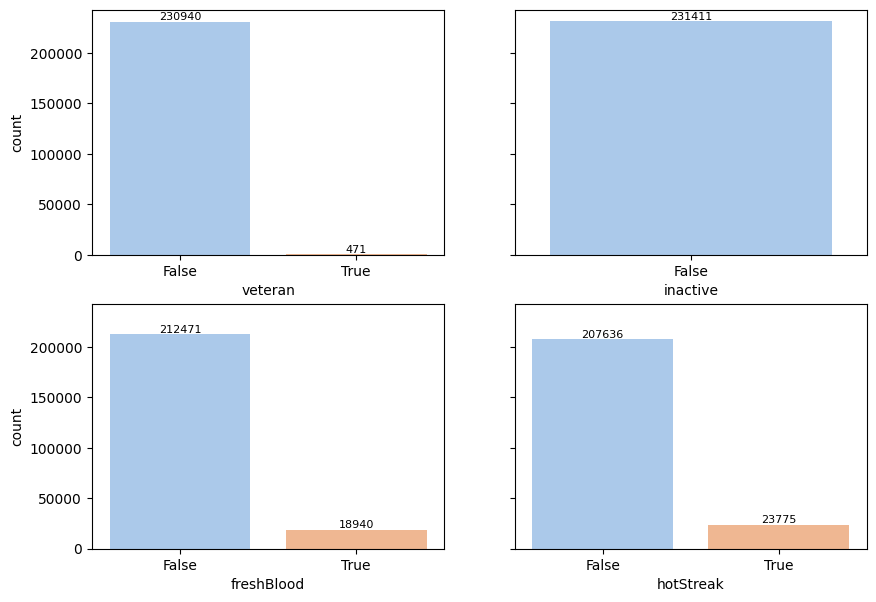

In [99]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print(win_rate_data["veteran"].value_counts())
print(win_rate_data["inactive"].value_counts())
print(win_rate_data["freshBlood"].value_counts())
print(win_rate_data["hotStreak"].value_counts())

cols = ['veteran', 'inactive', 'freshBlood', 'hotStreak']

fig, axes = plt.subplots(2, 2, figsize=(10, 7), sharey=True)

for ax, col in zip(axes.flatten(), cols):
    sns.countplot(data=win_rate_data, x=col, ax=ax, palette="pastel")
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', 
                    va='bottom',
                    fontsize=8, 
                    color='black')
plt.show()

**inactive**는 False 값만 있기에 의미가 없어 제거

In [102]:
drop_inac_data = win_rate_data.drop(["inactive"], axis=1)
drop_inac_data

,tier,rank,winRate,veteran,freshBlood,hotStreak,revisionDate,summonerLevel,churn
0,BRONZE,III,22.222222,False,False,False,40,38,1
1,DIAMOND,IV,57.692308,False,False,False,2,181,0
2,SILVER,IV,48.026316,False,False,False,3,611,0
3,IRON,I,41.666667,False,False,False,20,65,0
4,IRON,IV,33.333333,False,False,False,0,238,0
...,...,...,...,...,...,...,...,...,...
231406,IRON,I,48.387097,False,False,False,1,67,0
231407,SILVER,III,30.434783,False,False,False,15,137,0
231408,IRON,II,46.153846,False,False,False,42,165,1
231409,SILVER,I,27.272727,False,False,False,4,394,0


### Label encoding 및 One hot encoding

In [105]:
le = LabelEncoder()

prep_data = drop_inac_data.copy()

cols = ['tier', 'rank', 'veteran', 'freshBlood', 'hotStreak']

for col in cols:
    prep_data[col] = le.fit_transform(drop_inac_data[col])
prep_data

,tier,rank,winRate,veteran,freshBlood,hotStreak,revisionDate,summonerLevel,churn
0,0,2,22.222222,0,0,0,40,38,1
1,2,3,57.692308,0,0,0,2,181,0
2,9,3,48.026316,0,0,0,3,611,0
3,6,0,41.666667,0,0,0,20,65,0
4,6,3,33.333333,0,0,0,0,238,0
...,...,...,...,...,...,...,...,...,...
231406,6,0,48.387097,0,0,0,1,67,0
231407,9,2,30.434783,0,0,0,15,137,0
231408,6,1,46.153846,0,0,0,42,165,1
231409,9,0,27.272727,0,0,0,4,394,0


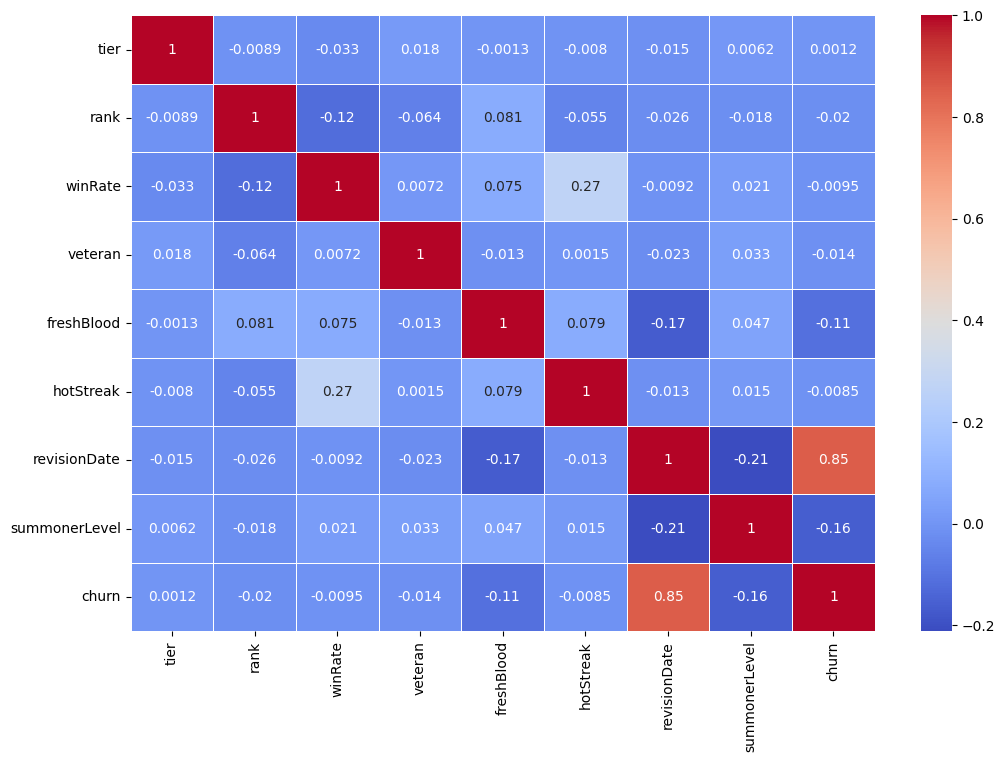

In [108]:
corr_matrix = prep_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [110]:
prep_data.to_csv("../data/EDA_data.csv", index=False, encoding="utf-8")